In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [5]:
# nltk.download('stopwords')

In [29]:
with open('twitterAPI.txt','r') as keys:
    key = keys.read()
keys = key.split('\n')

CONSUMER_KEY = keys[0].split('=')[1]
CONSUMER_SECRET = keys[1].split('=')[1]
ACCESS_TOKEN = keys[2].split('=')[1]
ACCESS_TOKEN_SECRET = keys[3].split('=')[1]

In [31]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [124]:
search_words = "Kapolri" + " -filter:retweets"
date_since = "2021-04-01"

In [126]:
# Collect tweets
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="id",
              since=date_since).items(1000)

# Iterate and print tweets
all_tweets = [tweet.text for tweet in tweets]

In [107]:
def remove_url(txt):
    
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [127]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Diam2 menghayutkan kira2 begitu Telegram Kapolri yang masyarakat tangkap',
 'Kapolri labil ih',
 'Kapolri',
 'Yth Bpk Kapolri mohon agar lebih serius menertibkan manusia2 perusak keberagaman di NKRI laporan PKB ke Polri seja',
 'Didampingi Kapolri Panglima TNI Letakan Batu Pertama Pembangunan Mako Guspurla Koarmada I Di Natuna']

In [131]:
words_in_tweet = [list(set(tweet.lower().split())) for tweet in all_tweets_no_urls]
stop_words = set(stopwords.words('indonesian'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]
collection_words = ['kapolri']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [132]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('telegram', 350),
 ('media', 261),
 ('larangan', 139),
 ('cabut', 135),
 ('kekerasan', 126),
 ('polisi', 117),
 ('surat', 108),
 ('yg', 79),
 ('arogansi', 74),
 ('listyo', 68),
 ('sigit', 63),
 ('larang', 62),
 ('dicabut', 62),
 ('polri', 61),
 ('aparat', 53)]

In [140]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,telegram,350
1,media,261
2,larangan,139
3,cabut,135
4,kekerasan,126


In [142]:
to_plot = clean_tweets_ncw.copy().head(15)

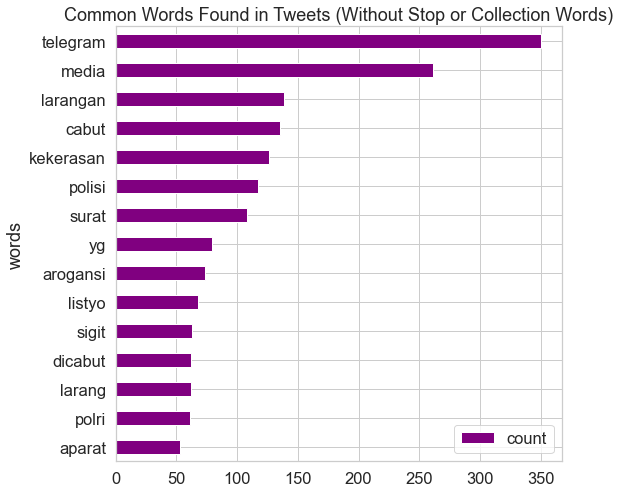

In [143]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
to_plot.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [145]:
# clean_tweets_ncw.to_csv('words.csv')